# Class Imbalance 실습

### Dataset Load - Abalone Dataset

In [4]:
# imblearn fetch_datasets 오류 시 사용
import pickle

with open('./datas/abalone_dataset.npz', 'rb') as f:
    [dataset] = pickle.load(f)

In [5]:
X, y = dataset.data, dataset.target

In [6]:
print('shape of X:', X.shape)
print('shape of y', y.shape)
print('y:', y)

shape of X: (4177, 10)
shape of y (4177,)
y: [-1  1 -1 ... -1 -1 -1]


### Data Preprocessing - Data Split / Feature Scaling

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
# 주어진 데이터셋을 train, test set으로 분할 (0.75 : 0.25)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [9]:
# StandardScaler 이용한 feature scaling 적용

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
# 분류 모델 구축을 위한 학습 알고리즘 선택 및 학습 (e.g. RandomForestClassifier)

clf = RandomForestClassifier()
clf.fit(X_train_scaled, y_train)

RandomForestClassifier()

### Inference

In [12]:
# train, test set에 대해 예측 수행 및 결과 출력

In [13]:
y_train_hat = clf.predict(X_train_scaled)
print('ground truth of y_train:', y_train)
print('prediction result of y_train:', y_train_hat)

ground truth of y_train: [ 1 -1 -1 ... -1 -1 -1]
prediction result of y_train: [ 1 -1 -1 ... -1 -1 -1]


In [14]:
y_test_hat = clf.predict(X_test_scaled)
print('ground truth of y_test:', y_test)
print('prediction result of y_test:', y_test_hat)

ground truth of y_test: [-1 -1 -1 ... -1 -1 -1]
prediction result of y_test: [-1 -1 -1 ... -1 -1 -1]


### Model Evaluation - Accuracy

In [15]:
# accuracy 이용한 예측 성능 평가 (train, test 모두)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
y_train_accuracy = accuracy_score(y_train, y_train_hat)
print('train_accuracy:', y_train_accuracy)

train_accuracy: 1.0


In [18]:
y_test_accuracy = accuracy_score(y_test, y_test_hat)
print('test_accuracy:', y_test_accuracy)

test_accuracy: 0.8899521531100478


### Model Evaluation - Confusion Matrix

In [19]:
# confusion matrix 이용한 예측 성능 평가 (train, test 모두)
## ConfusionMatrixDisplay 활용하기

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

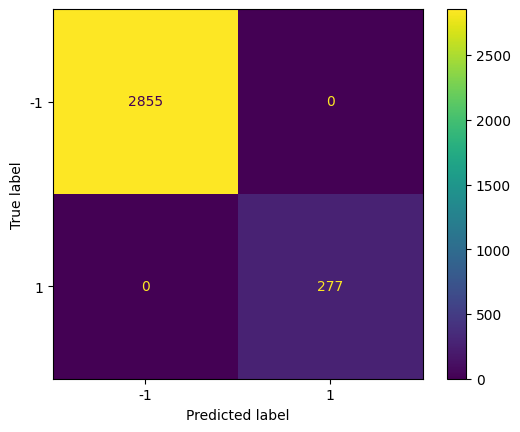

In [21]:
y_train_cm = confusion_matrix(y_train, y_train_hat)
y_train_cm_dp = ConfusionMatrixDisplay(confusion_matrix = y_train_cm, display_labels=clf.classes_)
y_train_cm_dp.plot()

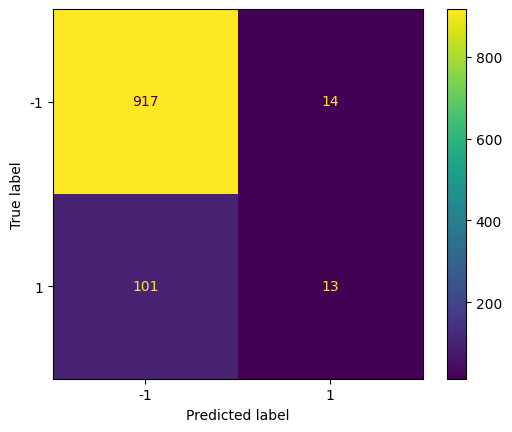

In [22]:
y_test_cm = confusion_matrix(y_test, y_test_hat)
y_test_cm_dp = ConfusionMatrixDisplay(confusion_matrix = y_test_cm, display_labels=clf.classes_)
y_test_cm_dp.plot()

### Model Evaluation - F1 score, AUROC

In [23]:
# f1 score, auroc 이용한 예측 성능 평가 후 accuracy 값과 비교

In [24]:
from sklearn.metrics import f1_score, roc_auc_score

In [25]:
y_train_f1 = f1_score(y_train, y_train_hat)
y_train_auroc = roc_auc_score(y_train, y_train_hat)

print('train_accuracy:', y_train_accuracy)
print('train_f1:', y_train_f1)
print('train_auroc:', y_train_auroc)

train_accuracy: 1.0
train_f1: 1.0
train_auroc: 1.0


In [26]:
y_test_f1 = f1_score(y_test, y_test_hat)
y_test_auroc = roc_auc_score(y_test, y_test_hat)

print('test_accuracy:', y_test_accuracy)
print('test_f1:', y_test_f1)
print('test_auroc:', y_test_auroc)

test_accuracy: 0.8899521531100478
test_f1: 0.1843971631205674
test_auroc: 0.5494987468671679


## Handling class imbalance - Resampling

### Dataset Load - Abalone Dataset

In [27]:
X, y = dataset.data, dataset.target

In [28]:
print('shape of X:', X.shape)
print('shape of y', y.shape)
print('y:', y)

shape of X: (4177, 10)
shape of y (4177,)
y: [-1  1 -1 ... -1 -1 -1]


In [29]:
# 각 class 별 인스턴스 수 확인 및 class imbalance 비율 확인

num_negative = (y<0).sum()
num_positive = (y>0).sum()

print('number of instances in negative class', num_negative)
print('number of instances in positive class', num_positive)
print('imbalance ratio -> 1 : %.3f'%(num_negative/num_positive))

number of instances in negative class 3786
number of instances in positive class 391
imbalance ratio -> 1 : 9.683


### Data Preprocessing - Data Split / Feature Scaling

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
# 주어진 데이터셋을 train, test set으로 분할 (0.75 : 0.25) / Stratified Sampling 기반의 split 적용

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0, stratify = y)

In [32]:
# StandardScaler 이용한 feature scaling 적용

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Data Preprocessing - Resampling

In [33]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids, TomekLinks, NearMiss, EditedNearestNeighbours
from collections import Counter

In [34]:
# imblearn 패키지로부터 resampler 불러온 후 resampling 적용
## 위의 import된 class들로부터 원하는 resampler를 선택할 수 있음
## TomekLinks, NearMiss, EditedNearestNeighbours의 경우 'random_state' argument 제거해야함
## NearMiss의 경우 'version' argument를 이용하여 원하는 version을 선택할 수 있음

In [35]:
resampler = RandomOverSampler(random_state=0)

In [36]:
X_train_resampled, y_train_resampled = resampler.fit_resample(X_train_scaled, y_train)

In [37]:
print('shape of X_train before resampling:', X_train_scaled.shape)
print('shape of X_train after resampling:', X_train_resampled.shape)

shape of X_train before resampling: (3132, 10)
shape of X_train after resampling: (5678, 10)


In [38]:
print('Composition of y_train before resampling', Counter(y_train))
print('Composition of y_train after resampling', Counter(y_train_resampled))

Composition of y_train before resampling Counter({-1: 2839, 1: 293})
Composition of y_train after resampling Counter({-1: 2839, 1: 2839})


### Model Training

In [39]:
# 분류 모델 구축을 위한 학습 알고리즘 선택 및 학습 (e.g. RandomForestClassifier)
## resampling 적용 전 후 각각에 대해 모델 구축 및 학습

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
clf_no_resampling = RandomForestClassifier(random_state=0)
clf_no_resampling.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=0)

In [42]:
clf_with_resampling = RandomForestClassifier()
clf_with_resampling.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

### Inference

In [43]:
# test set에 대해 두 모델의 예측 수행

y_test_hat_no_resampling = clf_no_resampling.predict(X_test_scaled)
y_test_hat_with_resampling = clf_with_resampling.predict(X_test_scaled)

### Model Evaluation

In [44]:
# accuracy 기반 두 모델의 예측 성능 평가 후 비교

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score

In [46]:
y_test_accuracy_no_resampling = accuracy_score(y_test, y_test_hat_no_resampling)
y_test_accuracy_with_resampling = accuracy_score(y_test, y_test_hat_with_resampling)

In [47]:
print('test_accuracy without resampling:', y_test_accuracy_no_resampling)
print('test_accuracy with resampling:', y_test_accuracy_with_resampling)

test_accuracy without resampling: 0.9033492822966507
test_accuracy with resampling: 0.8822966507177034


In [48]:
# confusion matrix 기반 두 모델의 예측 성능 평가 후 비교

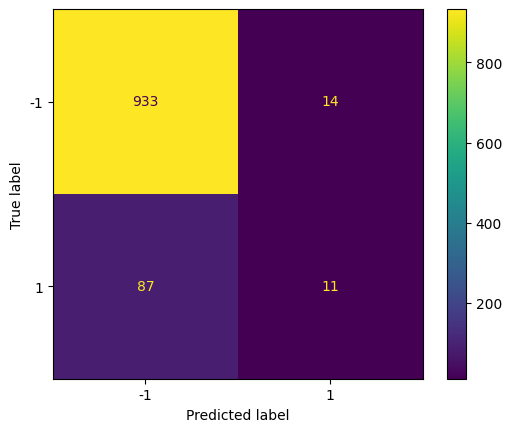

In [49]:
y_test_cm_no_resampling = confusion_matrix(y_test, y_test_hat_no_resampling)
y_test_cm_dp_no_resampling = ConfusionMatrixDisplay(confusion_matrix = y_test_cm_no_resampling, display_labels=clf.classes_)
y_test_cm_dp_no_resampling.plot()

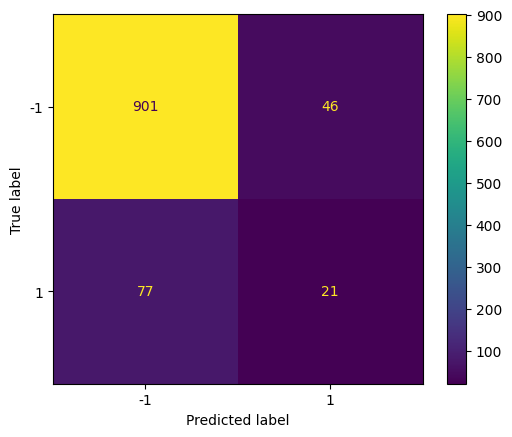

In [50]:
y_test_cm_with_resampling = confusion_matrix(y_test, y_test_hat_with_resampling)
y_test_cm_dp_with_resampling = ConfusionMatrixDisplay(confusion_matrix = y_test_cm_with_resampling, display_labels=clf.classes_)
y_test_cm_dp_with_resampling.plot()

In [51]:
# f1 score 기반 두 모델의 예측 성능 평가 후 비교

y_test_f1_no_resampling = f1_score(y_test, y_test_hat_no_resampling)
y_test_f1_with_resampling = f1_score(y_test, y_test_hat_with_resampling)

print('test_f1_score without resampling:', y_test_f1_no_resampling)
print('test_f1_score with resampling:', y_test_f1_with_resampling)

test_f1_score without resampling: 0.1788617886178862
test_f1_score with resampling: 0.2545454545454545


In [52]:
# auroc 기반 두 모델의 예측 성능 평가 후 비교

y_test_auroc_no_resampling = roc_auc_score(y_test, y_test_hat_no_resampling)
y_test_auroc_with_resampling = roc_auc_score(y_test, y_test_hat_with_resampling)

print('test_AUROC without resampling:', y_test_auroc_no_resampling)
print('test_AUROC with resampling:', y_test_auroc_with_resampling)

test_AUROC without resampling: 0.5487306855160227
test_AUROC with resampling: 0.5828556343339869


### Let's compare performance of resampling methods!

In [54]:
X, y = dataset.data, dataset.target
print('shape of X:', X.shape)
print('shape of y', y.shape)
print('y:', y)

num_negative = (y<0).sum()
num_positive = (y>0).sum()

print('number of instances in negative class', num_negative)
print('number of instances in positive class', num_positive)
print('imbalance ratio -> 1 : %.3f'%(num_negative/num_positive))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0, stratify = y)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

shape of X: (4177, 10)
shape of y (4177,)
y: [-1  1 -1 ... -1 -1 -1]
number of instances in negative class 3786
number of instances in positive class 391
imbalance ratio -> 1 : 9.683


In [55]:
resampler_list = ['No Resampling',
                  'RandomOverSampler', 'SMOTE', 'BorderlineSMOTE', 'ADASYN',
                  'RandomUnderSampler', 'ClusterCentroids', 'TomekLinks', 'NearMiss-1', 'NearMiss-2', 'NearMiss-3', 'EditedNearestNeighbours']

In [56]:
accuracy_list, f1_list, auroc_list = [], [], []

In [57]:
# for문 이용하여 각 방법별 예측 결과를 위의 list에 입력

for method in resampler_list:
    if method == 'No Resampling':
        X_train_resampled, y_train_resampled = X_train_scaled, y_train
    
    else:
        # Oversampling Methods
        if method == 'RandomOverSampler': resampler = RandomOverSampler(random_state=0)
        elif method == 'SMOTE': resampler = SMOTE(random_state=0)
        elif method == 'BorderlineSMOTE': resampler = BorderlineSMOTE(random_state=0)
        elif method == 'ADASYN': resampler = ADASYN(random_state=0)

        #Undersampling Methods
        elif method == 'RandomUnderSampler': resampler = RandomUnderSampler(random_state=0)
        elif method == 'ClusterCentroids': resampler = ClusterCentroids(random_state=0)
        elif method == 'TomekLinks': resampler = TomekLinks()
        elif method == 'NearMiss-1': resampler = NearMiss(version=1)
        elif method == 'NearMiss-2': resampler = NearMiss(version=2)
        elif method == 'NearMiss-3': resampler = NearMiss(version=3)
        elif method == 'EditedNearestNeighbours': resampler = EditedNearestNeighbours()  
    
    
        X_train_resampled, y_train_resampled = resampler.fit_resample(X_train_scaled, y_train)

    
    clf = RandomForestClassifier(random_state=0)
    clf.fit(X_train_resampled, y_train_resampled)

    y_test_hat = clf.predict(X_test_scaled)


    accuracy = accuracy_score(y_test, y_test_hat)
    f1= f1_score(y_test, y_test_hat)
    auroc = roc_auc_score(y_test, y_test_hat)

    accuracy_list.append(accuracy)
    f1_list.append(f1)
    auroc_list.append(auroc)

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [58]:
import pandas as pd
import numpy as np

In [59]:
res_df = pd.DataFrame(data = np.vstack([accuracy_list, f1_list, auroc_list]), columns=resampler_list, index=['accuracy', 'f1 score', 'auroc'])

In [60]:
display(res_df)

,No Resampling,RandomOverSampler,SMOTE,BorderlineSMOTE,ADASYN,RandomUnderSampler,ClusterCentroids,TomekLinks,NearMiss-1,NearMiss-2,NearMiss-3,EditedNearestNeighbours
accuracy,0.903349,0.887081,0.868900,0.858373,0.871770,0.753110,0.718660,0.887081,0.156938,0.217225,0.817225,0.860287
f1 score,0.178862,0.280488,0.380090,0.333333,0.401786,0.391509,0.366379,0.191781,0.114573,0.168699,0.377850,0.438462
auroc,0.548731,0.594644,0.671519,0.642841,0.686825,0.795169,0.785310,0.553477,0.347311,0.499499,0.716193,0.735378


In [61]:
# Best resampler 선택 후 다시 모델 구축 및 학습하여 confusion matrix 확인

In [62]:
resampler = EditedNearestNeighbours()
X_train_resampled, y_train_resampled = resampler.fit_resample(X_train_scaled, y_train)

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train_resampled, y_train_resampled)

y_test_hat = clf.predict(X_test_scaled)

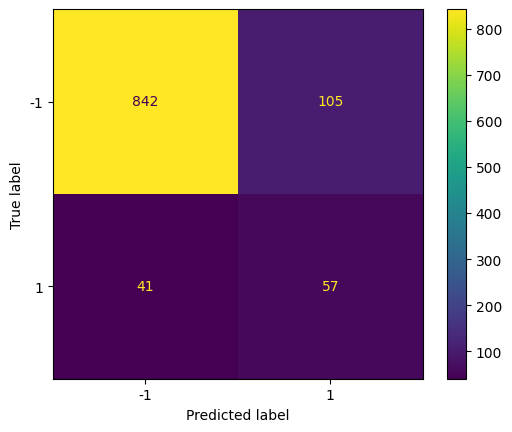

In [63]:
y_test_cm = confusion_matrix(y_test, y_test_hat)
y_test_cm_dp = ConfusionMatrixDisplay(confusion_matrix = y_test_cm, display_labels=clf.classes_)
y_test_cm_dp.plot()